## Estadística Aplicada

Nombre: Francisco Javier Chavez Hernandez
 
Matrícula: 2034204

Grupo: 044

Fecha: 10/oct/23

In [1]:
## librerias básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## librerias especializadas
from statsmodels.tsa.holtwinters import ExponentialSmoothing
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12

In [5]:
## importar los datos
pasajeros=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month', parse_dates=True)

In [6]:
pasajeros=pasajeros.asfreq('MS') ###Month start 

In [7]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

### Promedio móvil simple PMS
El promedio móvil simple es una técnica de suavizado de series de tiempo que se utiliza para reducir el ruido y las fluctuaciones aleatorias en los datos, es decir, obtener la tenencia ciclo de los datos.

La ecuación del promedio móvil simple:

$$
\frac{1}{n} \sum_{i=0}^{n-1} y_{t-i}
$$

Donde $y_t$ es el valor de la serie de tiempo en el tiempo $t$ y $n$ es el número de períodos que se utilizan para calcular el promedio móvil. 

In [9]:
## calcular promedio móvil simple
pasajeros['PMS-12']=pasajeros['Thousands of Passengers'].rolling(12).mean()

### Promedio móvil centrado 
El promedio móvil centrado es una técnica de suavizado de series de tiempo que se utiliza para reducir el ruido y las fluctuaciones aleatorias en los datos, es decir, obtener la tenencia ciclo de los datos.

Ecuación del promedio móvil centrado:

$$
\frac{1}{n} \sum_{i=-\lfloor\frac{n}{2}\rfloor}^{\lfloor\frac{n}{2}\rfloor} x_{t-i}
$$

Donde $y_t$ es el valor de la serie de tiempo en el tiempo $t$ y $n$ es el número de períodos que se utilizan para calcular el promedio móvil centrado.

In [10]:
## calcular promedio móvil centrado
pasajeros['PMC-11']=pasajeros['Thousands of Passengers'].rolling(11,center=True).mean()

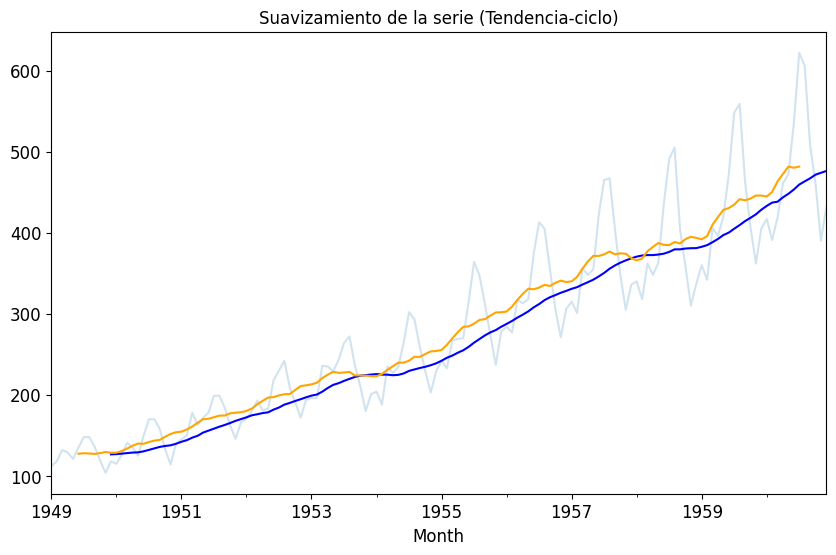

In [18]:
#Graficar
pasajeros['Thousands of Passengers'].plot(alpha=0.2)
pasajeros['PMS-12'].plot(color='blue')
pasajeros['PMC-11'].plot(color='orange')
plt.title('Suavizamiento de la serie (Tendencia-ciclo)');

## MÉTODO HOLT-WINTERS
El método Holt-Winters es un procedimiento de pronóstico de series de tiempo muy común capaz de incluir tanto tendencia como estacionalidad. El método Holt-Winters en sí es una combinación de otros tres componentes mucho más simples, todos los cuales son métodos de suavizado:

* Suavizado exponencial simple (SES): el suavizado exponencial simple supone que la serie de tiempo no tiene cambios de nivel. Por lo tanto, no se puede utilizar con series que contengan tendencia, estacionalidad o ambas.
* Suavizado exponencial (doble) de Holt (HES): El suavizado exponencial de Holt está un paso por encima del suavizado exponencial simple, ya que permite que los datos de series temporales tengan un componente de tendencia. El suavizamiento exponencial de Holt todavía es incapaz de hacer frente a los datos estacionales.
* Suavizado exponencial (triple) Winters (WES): El suavizado exponencial de Winters es una extensión del suavizado exponencial de Holt que finalmente permite la inclusión de la estacionalidad. El suavizamiento exponencial de Winter es lo que se conoce como método de Holt-Winters.

Por lo tanto, el método Holt-Winters a menudo se denomina suavizado exponencial triple, ya que es literalmente la combinación de 3 métodos de suavizado construidos uno encima del otro.

### Suavizado exponencial  simple
El suavizado exponencial simple es una técnica de suavizado de series de tiempo que se utiliza para reducir el ruido y las fluctuaciones aleatorias en los datos. Se calcula tomando el promedio ponderado de un rango de valores de la serie, donde los valores más recientes tienen un peso mayor que los valores más antiguos. La ecuación del suavizado exponencial simple es:

$$
L_{t+1} = \alpha y_t + (1-\alpha) L_{t}
$$
Esta ecuación se conoce como ecuación de actualización de nivel , ya que actualiza el nivel del paso de tiempo actual en función de la estimación del nivel anterior.  Por lo tanto, la ecuación es recursiva, ya que cada estimación de nivel debe calcularse utilizando todas las estimaciones anteriores.
Donde $L_{t+1}$ es el pronóstico para el período $t+1$, $y_t$ es el valor de la serie de tiempo en el período $t$, $L_t$ es el pronóstico para el período $t$, y  $\alpha$ es el factor de suavizado, $0<\alpha<1$ que es un número entre 0 y 1 que determina la importancia relativa de los valores más recientes en el cálculo del pronóstico. Un valor de $\alpha$ más cercano a 1 da más peso a los valores más recientes, mientras que un valor de $\alpha$ más cercano a 0 da más peso a los valores más antiguos.


el problema es definir el $alpha$
El comando `.ewm` es una función de pandas que se utiliza para calcular la media móvil exponencial ponderada. Esta función se utiliza para suavizar los datos y reducir el ruido en los datos. La media móvil exponencial ponderada se calcula utilizando una fórmula que asigna pesos a los datos en función de su antigüedad. Los datos más recientes tienen un peso mayor que los datos más antiguos. 

La sintaxis básica del comando `.ewm` es la siguiente:

```python
DataFrame.ewm(alpha=None, beta=None, com=None, span=None, min_periods=0, adjust=True, ignore_na=False, axis=0)
```

Donde:
- `alpha`: Es el factor de suavizado. Si se especifica `alpha`, se ignoran los valores de `com` y `span`.
- `com`: Es el período de tiempo de la media móvil exponencial ponderada. Si se especifica `com`, se ignoran los valores de `alpha` y `span`.
- `span`: Es el número de períodos de tiempo que se utilizarán para calcular la media móvil exponencial ponderada. Si se especifica `span`, se ignoran los valores de `alpha` y `com`.
- `min_periods`: Es el número mínimo de períodos de tiempo necesarios para calcular la media móvil exponencial ponderada.
- `adjust`: Es un parámetro booleano que indica si se debe ajustar el peso de los datos en función de su antigüedad.
- `ignore_na`: Es un parámetro booleano que indica si se deben ignorar los valores `NaN`.
- `axis`: Es el eje a lo largo del cual se calculará la media móvil exponencial ponderada.

In [19]:
## calcular
pasajeros['SES']=pasajeros['Thousands of Passengers'].ewm(span=12, adjust=False).mean()

<Axes: xlabel='Month'>

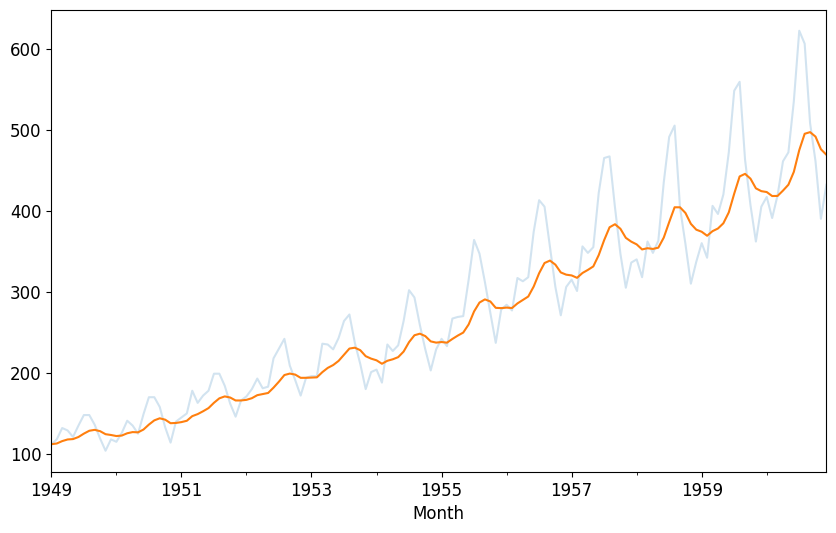

In [21]:
pasajeros['Thousands of Passengers'].plot(alpha=0.2)
pasajeros['SES'].plot()

### Suavizado exponencial doble
El suavizado exponencial doble o de Holt modela la tendencia y el nivel de la serie. El método de Holt a menudo se denomina suavizamiento doble exponencial:

$$
\begin{aligned}
L_t &= \alpha y_t + (1 - \alpha)(L_{t-1} + T_{t-1}) \\
T_t &= \beta(L_t - L_{t-1}) + (1 - \beta)T_{t-1} \\
F_{t+1} &= L_t + T_t
\end{aligned}
$$

Donde $y_t$ es el valor de la serie de tiempo en el tiempo $t$, $L_t$ es el nivel estimado de la serie de tiempo en el tiempo $t$, $T_t$ es la tendencia estimada de la serie de tiempo en el tiempo $t$, $F_{t+1}$ es el pronóstico para el período $t+1$, $\alpha$ es el factor de suavizado para el nivel, $\beta$ es el factor de suavizado para la tendencia, y $L_{t-1}$ y $T_{t-1}$ son los valores estimados del nivel y la tendencia en el período anterior, respectivamente. 

In [29]:
### código
pasajeros['SED']=ExponentialSmoothing(pasajeros['Thousands of Passengers'],trend='Mul').fit().fittedvalues.shift(-1)


<Axes: xlabel='Month'>

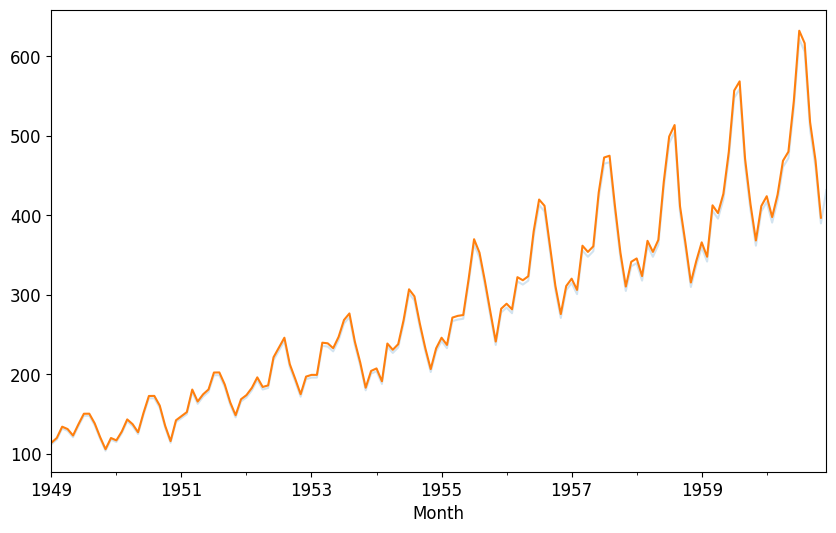

In [31]:
pasajeros['Thousands of Passengers'].plot(alpha=0.2)
pasajeros['SED'].plot()

### Suavizamiento exponencial triple
El suavizado exponencial triple o de Holt-Winters modela la tendencia, la estacionalidad y el nivel de la serie:
$$
\begin{aligned}
L_t &= \alpha (y_t-S_{t-m}) + (1 - \alpha)(L_{t-1} + T_{t-1}) \\
T_t &= \beta(L_t - L_{t-1}) + (1 - \beta)T_{t-1} 
\\
S_t &= \gamma (y_t-L_t) +(1-\gamma)S_{t-m}
\\
F_{t+1} &= L_t + T_t + S_{t+1-m}
\end{aligned}
$$

Una vez más, se introduce otra constante de suavizado: $\gamma$. La constante de suavizado también tiene el dominio $0≤\gamma≤1$, y $m$ es la longitud del ciclo estacional. Esta ecuación de actualización específica es para una serie temporal con nivel aditivo. 

La ecuación de actualización de nivel original no funciona correctamente con datos estacionales. Por lo tanto, dado que ahora se supone que la serie temporal tiene un componente estacional, la ecuación de nivel debe primero “desestacionalizar” los datos para lograr una estimación de nivel adecuada.



In [46]:
pasajeros['HoltWinters']=ExponentialSmoothing(pasajeros['Thousands of Passengers'], trend='add',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)

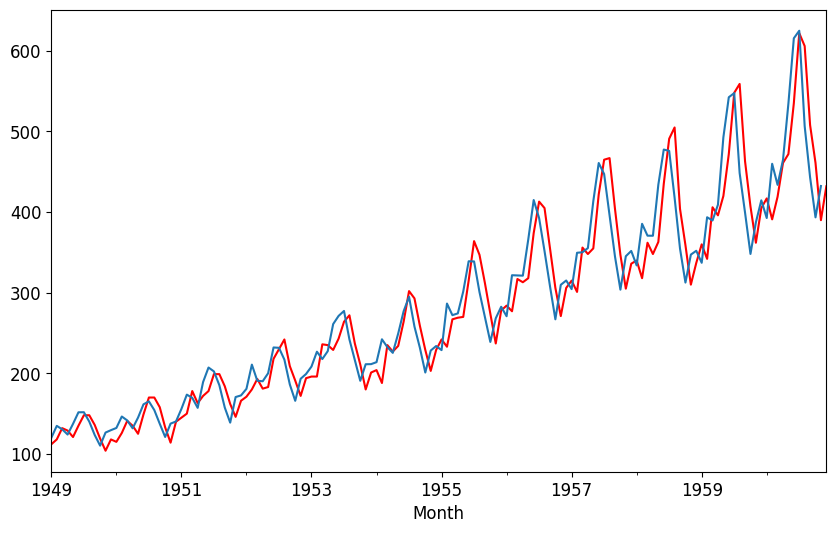

In [47]:
pasajeros['Thousands of Passengers'].plot(color='red')
pasajeros['HoltWinters'].plot();

In [53]:
## guardar el modelo
holtwinters_model=ExponentialSmoothing(pasajeros['Thousands of Passengers'],trend='add',seasonal='mul',seasonal_periods=12).fit()

In [58]:
pronostico_yh=holtwinters_model.forecast(120)

Text(0.5, 1.0, 'Serie original vs pronostico 10 años')

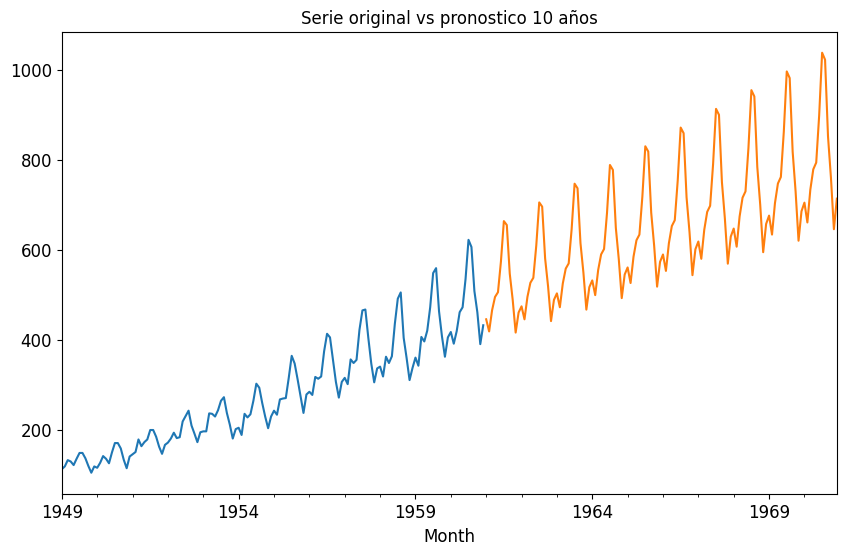

In [60]:
pasajeros['Thousands of Passengers'].plot()
pronostico_yh.plot()
plt.title('Serie original vs pronostico 10 años')

In [63]:
pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ------------ ------------------------- 30.7/96.5 kB 262.6 kB/s eta 0:00:01
     ---------------- --------------------- 41.0/96.5 kB 279.3 kB/s eta 0:00:01
     ------------------------ ------------- 61.4/96.5 kB 363.1 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 403.5 kB/s eta 0:00:01
     -------------------------------------- 96.5/96.5 kB 394.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [66]:
pasajeros_metrorrey=pd.read_excel('pasajeros_metrorrey.xls',index_col='mes')

In [67]:
pasajeros_metrorrey.head()

,miles_pasajeros_metrorrey
mes,
2010-01-01,10755.80
2010-02-01,10978.85
2010-03-01,12489.28
2010-04-01,11415.78
2010-05-01,12284.87


In [69]:
pasajeros_metrorrey=pasajeros_metrorrey.asfreq('MS')

In [70]:
pasajeros_metrorrey.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='mes', length=163, freq='MS')

Modelo de holt-winters para pronosticar los pasajeros de metrorrey

In [72]:
holtwinters_model2=ExponentialSmoothing(pasajeros_metrorrey['miles_pasajeros_metrorrey'],trend='add',seasonal='mul',seasonal_periods=12).fit()

In [73]:
## pronostico de pasajeros los siguientes dos años
pronostico_pasajerosMR=holtwinters_model2.forecast(24)

In [82]:
pasajeros_metrorrey['PMC-11']=pasajeros_metrorrey['miles_pasajeros_metrorrey'].rolling(11,center=True).mean()

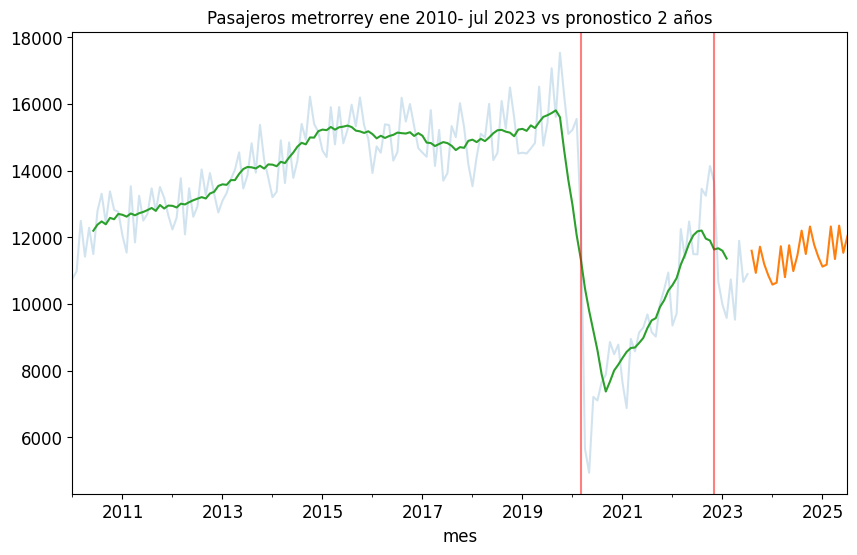

In [86]:
pasajeros_metrorrey['miles_pasajeros_metrorrey'].plot(alpha=0.2)
pronostico_pasajerosMR.plot(label='serie suavizada')
pasajeros_metrorrey['PMC-11'].plot()
plt.title('Pasajeros metrorrey ene 2010- jul 2023 vs pronostico 2 años')
plt.axvline(x='2022-11-01',label='cierre linea 2',alpha=0.5,color='red')
plt.axvline(x='2020-03',label='lockdown',alpha=0.5,color='red')